In [188]:
!pip install -q kaggle

In [189]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [190]:
! kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

apartment-rental-offers-in-germany.zip: Skipping, found more recently modified local copy (use --force to force download)


In [191]:
!unzip '/content/apartment-rental-offers-in-germany.zip' -d '/content/'

Archive:  /content/apartment-rental-offers-in-germany.zip
replace /content/immo_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: /content/immo_data.csv  


In [192]:
import pandas as pd

df = pd.read_csv('/content/immo_data.csv')
df

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [194]:
df = df[['serviceCharge', 'heatingType', 'telekomUploadSpeed', 'totalRent']]


In [195]:
df = df.dropna(thresh=0.5*df.shape[0], axis=1)
df = df.drop(df[df['totalRent'] == 0.0].index)
df.shape

(268614, 4)

In [196]:
print('Types : {}'.format(df['heatingType'].nunique()))

Types : 13


In [197]:
for column in df.columns:
    if df[column].dtype == float or df[column].dtype == int:
        upper = df[column].mean() + 3 * df[column].std()
        lower = df[column].mean() - 3 * df[column].std()
        rows = df[(df[column] > upper) | (df[column] < lower)].index

        df.drop(rows, inplace=True)
  

In [198]:
df['heatingType'].fillna(df['heatingType'].mode()[0], inplace=True)
df.fillna(df._get_numeric_data().mean(),inplace = True)


In [199]:
df.isna().sum()

serviceCharge         0
heatingType           0
telekomUploadSpeed    0
totalRent             0
dtype: int64

In [200]:
df['heatingType'].value_counts()

central_heating                   173519
district_heating                   24767
gas_heating                        19934
self_contained_central_heating     19043
floor_heating                      17658
oil_heating                         5040
heat_pump                           2732
combined_heat_and_power_plant       1976
night_storage_heater                1334
wood_pellet_heating                  961
electric_heating                     900
stove_heating                        341
solar_heating                        166
Name: heatingType, dtype: int64

In [201]:
def edit_heating_type(x):
    if x in others:
        return 'other'
    else:
        return x

others = list(df['heatingType'].value_counts().tail(8).index)
df['edited_heatingType'] = df['heatingType'].apply(edit_heating_type)
df = df.drop(columns=['heatingType'])
df['edited_heatingType'].value_counts()

central_heating                   173519
district_heating                   24767
gas_heating                        19934
self_contained_central_heating     19043
floor_heating                      17658
other                              13450
Name: edited_heatingType, dtype: int64

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268371 entries, 0 to 268849
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   serviceCharge       268371 non-null  float64
 1   telekomUploadSpeed  268371 non-null  float64
 2   totalRent           268371 non-null  float64
 3   edited_heatingType  268371 non-null  object 
dtypes: float64(3), object(1)
memory usage: 10.2+ MB


In [203]:
df.describe()

,serviceCharge,telekomUploadSpeed,totalRent
count,268371.000000,268371.000000,268371.000000
mean,149.850851,28.763488,813.931950
std,82.993521,15.206258,547.205183
min,0.000000,1.000000,1.000000
25%,96.000000,10.000000,495.000000
50%,140.000000,40.000000,742.060000
75%,185.000000,40.000000,900.000000
max,1070.000000,40.000000,64651.000000


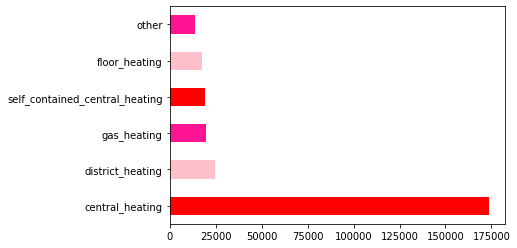

In [204]:
df['edited_heatingType'].value_counts().plot(kind='barh', color=['red', 'pink', 'deeppink'])

In [205]:
import numpy as np
from sklearn.model_selection import train_test_split


In [206]:
target = df['totalRent']
df = df.drop('totalRent', axis=1)

In [207]:
dummies_feature = pd.get_dummies(df['edited_heatingType'])
df = pd.concat([df, dummies_feature], axis=1)
df = df.drop('edited_heatingType', axis=1)


In [208]:
df

,serviceCharge,telekomUploadSpeed,central_heating,district_heating,floor_heating,gas_heating,other,self_contained_central_heating
0,245.00,10.000000,1,0,0,0,0,0
1,134.00,10.000000,0,0,0,0,0,1
2,255.00,2.400000,0,0,1,0,0,0
3,58.15,40.000000,0,1,0,0,0,0
4,138.00,28.763488,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
268845,90.00,10.000000,0,0,0,0,1,0
268846,220.00,28.763488,0,0,0,1,0,0
268847,220.00,40.000000,1,0,0,0,0,0
268848,175.00,28.763488,0,0,0,0,1,0


In [209]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=43)

# for col in X_train.columns:
#     if not X_train[col].isin([0, 1]).all():
#           X_train[col] = ((X_train[col] - X_train[col].mean())/(X_train[col].std()))

# for col in X_test.columns:
#     if not X_test[col].isin([0, 1]).all():
#           X_test[col] = ((X_test[col] - X_train[col].mean())/(X_train[col].std()))


In [210]:
from sklearn.preprocessing import MinMaxScaler

In [211]:
standard = MinMaxScaler()

In [212]:
X_train = standard.fit_transform(X_train)

In [213]:
X_test = standard.transform(X_test)

In [214]:
class LiniearRegressionWithMSE() :   
    def __init__(self, alpha=0.05 , iterations=1000):
        self.alpha = alpha
        self.iter = iterations 
    
    def fit(self, X, y): 
        self.m, self.n = X.shape 
        self.W = np.random.normal(loc=0.0, scale=0.001, size=self.n)
        self.b = 0

        for i in range(self.iter) :
            y_pred = self.predict(X)
            error = y - y_pred
            dW = -(2 * (X.T).dot(error)) / self.m
            db = -2 * np.sum(error) / self.m
            self.W = self.W - self.alpha * dW
            self.b = self.b - self.alpha * db 
        return self

    def predict(self, X) :
        return (X.dot( self.W ) + self.b)
    

In [215]:
mse_reg = LiniearRegressionWithMSE(alpha=0.1)

In [216]:
mse_reg.fit(X_train, y_train)

In [217]:
y_pre_mse = mse_reg.predict(X_test)


In [218]:
from sklearn import metrics
metrics.r2_score(y_test, y_pre_mse)

0.38759939728490267

In [219]:
metrics.mean_squared_error(y_test, y_pre_mse)

156736.7871010926

## 2. Sklearn

In [220]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge


In [221]:
linearReg = LinearRegression()

In [222]:
linearReg.fit(X_train, y_train)

LinearRegression()

In [223]:
y_pre_lr = linearReg.predict(X_test)

In [224]:
metrics.r2_score(y_test, y_pre_lr)

0.4209749490045015

In [225]:
metrics.mean_squared_error(y_test, y_pre_lr)

148194.7041556094

## 3. Lasso and Ridgde

### 1. Preprocessing

In [226]:
import pandas as pd

df = pd.read_csv('/content/immo_data.csv')
df

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [228]:
df.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [229]:
df = df.dropna(thresh=0.5*df.shape[0], axis=1)
df.shape

(268850, 42)

In [230]:
df = df.drop(df[df['totalRent'] == 0.0].index)
df.shape

(268614, 42)

In [231]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('cols : {} , Types : {}'.format(cols,df[cols].nunique()))

cols : regio1 , Types : 16
cols : heatingType , Types : 13
cols : telekomTvOffer , Types : 3
cols : newlyConst , Types : 2
cols : balcony , Types : 2
cols : firingTypes , Types : 132
cols : hasKitchen , Types : 2
cols : geo_bln , Types : 16
cols : cellar , Types : 2
cols : houseNumber , Types : 5510
cols : geo_krs , Types : 419
cols : condition , Types : 10
cols : interiorQual , Types : 4
cols : petsAllowed , Types : 3
cols : street , Types : 52357
cols : streetPlain , Types : 54468
cols : lift , Types : 2
cols : typeOfFlat , Types : 10
cols : garden , Types : 2
cols : regio2 , Types : 419
cols : regio3 , Types : 8683
cols : description , Types : 212402
cols : facilities , Types : 189425
cols : date , Types : 4


In [232]:
df = df.drop(columns=[
                      'facilities',
                      'description',
                      'streetPlain',
                      'street',
                      'geo_krs',
                      'firingTypes',
                      'houseNumber',])

In [233]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'hasKitchen', 'geo_bln', 'cellar', 'yearConstructedRange', 'baseRent',
       'livingSpace', 'condition', 'interiorQual', 'petsAllowed', 'lift',
       'baseRentRange', 'typeOfFlat', 'geo_plz', 'noRooms', 'thermalChar',
       'floor', 'numberOfFloors', 'noRoomsRange', 'garden', 'livingSpaceRange',
       'regio2', 'regio3', 'date'],
      dtype='object')

In [234]:
df.drop(columns=[
                 'livingSpaceRange',
                 'geo_plz',
                 'scoutId',
                 'telekomUploadSpeed',
                 'telekomTvOffer',
                 'pricetrend',
                 'noRoomsRange',
                 'picturecount',
                 'geo_bln',
                 'date',
                 'baseRentRange',
                 'yearConstructedRange']
        ,inplace=True)

In [235]:
df.drop_duplicates(keep=False,inplace=True)
df.shape

(257589, 23)

In [236]:
for column in df.columns:
  print(df[column].dtype)

object
float64
object
bool
bool
float64
float64
bool
bool
float64
float64
object
object
object
bool
object
float64
float64
float64
float64
bool
object
object


In [237]:
for column in df.columns:
    if df[column].dtype == float or df[column].dtype == int:
        upper = df[column].mean() + 3 * df[column].std()
        lower = df[column].mean() - 3 * df[column].std()
        rows = df[(df[column] > upper) | (df[column] < lower)].index

        df.drop(rows, inplace=True)
  

In [238]:
df.isna().sum()

regio1                  0
serviceCharge        6628
heatingType         42238
newlyConst              0
balcony                 0
totalRent           38399
yearConstructed     54653
hasKitchen              0
cellar                  0
baseRent                0
livingSpace             0
condition           64634
interiorQual       106010
petsAllowed        107883
lift                    0
typeOfFlat          34314
noRooms                 0
thermalChar        101782
floor               48502
numberOfFloors      91846
garden                  0
regio2                  0
regio3                  0
dtype: int64

In [239]:
df.fillna(df._get_numeric_data().mean(),inplace = True)
df['heatingType'].fillna(df['heatingType'].mode()[0], inplace=True)
df['condition'].fillna(df['condition'].mode()[0], inplace=True)
df['interiorQual'].fillna(df['interiorQual'].mode()[0], inplace=True)
df['petsAllowed'].fillna(df['petsAllowed'].mode()[0], inplace=True)
df['typeOfFlat'].fillna(df['typeOfFlat'].mode()[0], inplace=True)


In [240]:
df.isna().sum()

regio1             0
serviceCharge      0
heatingType        0
newlyConst         0
balcony            0
totalRent          0
yearConstructed    0
hasKitchen         0
cellar             0
baseRent           0
livingSpace        0
condition          0
interiorQual       0
petsAllowed        0
lift               0
typeOfFlat         0
noRooms            0
thermalChar        0
floor              0
numberOfFloors     0
garden             0
regio2             0
regio3             0
dtype: int64

In [241]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('cols : {} , Types : {}'.format(cols,df[cols].nunique()))

cols : regio1 , Types : 16
cols : heatingType , Types : 13
cols : newlyConst , Types : 2
cols : balcony , Types : 2
cols : hasKitchen , Types : 2
cols : cellar , Types : 2
cols : condition , Types : 10
cols : interiorQual , Types : 4
cols : petsAllowed , Types : 3
cols : lift , Types : 2
cols : typeOfFlat , Types : 10
cols : garden , Types : 2
cols : regio2 , Types : 419
cols : regio3 , Types : 8638


In [242]:
df['regio1'].value_counts()

Nordrhein_Westfalen       60273
Sachsen                   53522
Bayern                    20924
Sachsen_Anhalt            18728
Hessen                    16918
Niedersachsen             16021
Baden_Württemberg         15484
Berlin                     9815
Rheinland_Pfalz            8006
Thüringen                  7936
Brandenburg                6587
Schleswig_Holstein         6420
Mecklenburg_Vorpommern     6324
Hamburg                    3603
Bremen                     2851
Saarland                   1378
Name: regio1, dtype: int64

In [243]:
others = list(df['regio1'].value_counts().tail(6).index)

def edit_condition(x):
    if x in others:
        return 'other'
    else:
        return x
    
df['edited_regio1'] = df['regio1'].apply(edit_condition)
df = df.drop(columns=['regio1'])
df['edited_regio1'].value_counts()

Nordrhein_Westfalen    60273
Sachsen                53522
other                  27163
Bayern                 20924
Sachsen_Anhalt         18728
Hessen                 16918
Niedersachsen          16021
Baden_Württemberg      15484
Berlin                  9815
Rheinland_Pfalz         8006
Thüringen               7936
Name: edited_regio1, dtype: int64

In [244]:
df['regio2'].value_counts()

Leipzig                         12809
Chemnitz                        11393
Berlin                           9815
Dresden                          7055
Magdeburg                        4547
                                ...  
Freyung_Grafenau_Kreis             26
Schweinfurt_Kreis                  26
Haßberge_Kreis                     23
Neustadt_a.d._Waldnaab_Kreis       16
Kronach_Kreis                      12
Name: regio2, Length: 419, dtype: int64

In [245]:
others = list(df['regio2'].value_counts().tail(409).index)

    
df['edited_regio2'] = df['regio2'].apply(edit_condition)
df = df.drop(columns=['regio2'])
df['edited_regio2'].value_counts()

other                189082
Leipzig               12809
Chemnitz              11393
Berlin                 9815
Dresden                7055
Magdeburg              4547
München                4261
Halle_Saale            4175
Essen                  4140
Frankfurt_am_Main      3910
Hamburg                3603
Name: edited_regio2, dtype: int64

In [246]:
df['regio3'].value_counts()

Innenstadt       4515
Stadtmitte       2583
Altstadt         2197
Sonnenberg       1748
Kaßberg          1554
                 ... 
Ludwigswinkel       1
Kirchenlamitz       1
Pellingen           1
Schönecken          1
Eberfing            1
Name: regio3, Length: 8638, dtype: int64

In [247]:
others = list(df['regio3'].value_counts().tail(8620).index)

    
df['edited_regio3'] = df['regio3'].apply(edit_condition)
df = df.drop(columns=['regio3'])
df['edited_regio3'].value_counts()

other             230289
Innenstadt          4515
Stadtmitte          2583
Altstadt            2197
Sonnenberg          1748
Kaßberg             1554
Mitte               1507
Schloßchemnitz      1195
Hilbersdorf         1045
Südstadt            1022
Zentrum             1014
Merseburg            808
Freiberg             796
Stadtfeld_Ost        795
Bernsdorf            770
Gablenz              762
Mitte_Mitte          757
Lutherviertel        731
Halberstadt          702
Name: edited_regio3, dtype: int64

In [248]:
df['heatingType'].value_counts()

central_heating                   164333
district_heating                   23114
gas_heating                        19194
self_contained_central_heating     18170
floor_heating                      16912
oil_heating                         4935
heat_pump                           2659
combined_heat_and_power_plant       1925
night_storage_heater                1269
wood_pellet_heating                  944
electric_heating                     862
stove_heating                        309
solar_heating                        164
Name: heatingType, dtype: int64

In [249]:
others = list(df['heatingType'].value_counts().tail(8).index)

   
df['edited_heatingType'] = df['heatingType'].apply(edit_condition)
df = df.drop(columns=['heatingType'])
df['edited_heatingType'].value_counts()

central_heating                   164333
district_heating                   23114
gas_heating                        19194
self_contained_central_heating     18170
floor_heating                      16912
other                              13067
Name: edited_heatingType, dtype: int64

In [250]:
df['condition'].value_counts()

well_kept                             128282
refurbished                            25117
fully_renovated                        25026
mint_condition                         21107
first_time_use                         20626
modernized                             16450
first_time_use_after_refurbishment     14805
negotiable                              2053
need_of_renovation                      1320
ripe_for_demolition                        4
Name: condition, dtype: int64

In [251]:
others = list(df['condition'].value_counts().tail(5).index)

df['edited_condition'] = df['condition'].apply(edit_condition)
df = df.drop(columns=['condition'])
df['edited_condition'].value_counts()

well_kept          128282
other               34632
refurbished         25117
fully_renovated     25026
mint_condition      21107
first_time_use      20626
Name: edited_condition, dtype: int64

In [252]:
df['typeOfFlat'].value_counts()

apartment              158408
roof_storey             33332
ground_floor            30120
other                    9122
maisonette               8879
raised_ground_floor      5392
penthouse                3385
terraced_flat            3270
half_basement            1973
loft                      909
Name: typeOfFlat, dtype: int64

In [253]:
others = list(df['typeOfFlat'].value_counts().tail(5).index)

df['edited_typeOfFlat'] = df['typeOfFlat'].apply(edit_condition)
df = df.drop(columns=['typeOfFlat'])
df['edited_typeOfFlat'].value_counts()

apartment       158408
roof_storey      33332
ground_floor     30120
other            24051
maisonette        8879
Name: edited_typeOfFlat, dtype: int64

In [254]:
columns = []
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'bool':
        columns.append(col)
        
dummies_feature = pd.get_dummies(df[columns])
df = pd.concat([df, dummies_feature], axis=1)

df = df.drop(columns=columns)

target = df['totalRent']
df = df.drop('totalRent', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=43)

for col in X_train.columns:
    if (X_train[col].dtype == 'int64' or X_train[col].dtype == 'float64') and not X_train[col].isin([0, 1]).all():
          X_train[col] = ((X_train[col] - X_train[col].mean())/(X_train[col].std()))

for col in X_test.columns:
    if (X_test[col].dtype == 'int64' or X_test[col].dtype == 'float64') and not X_test[col].isin([0, 1]).all():
          X_test[col] = ((X_test[col] - X_test[col].mean())/(X_test[col].std()))


### 2. Train

#### a) Ridge

In [255]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
y_pre_ri = ridge.predict(X_test)


In [256]:
metrics.r2_score(y_test, y_pre_ri)

0.5535044428178639

#### b) Lasso

In [257]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pre_la = lasso.predict(X_test)

In [258]:
metrics.r2_score(y_test, y_pre_la)

0.5537851596018275